# BIOINF 305. Assignment - week 38.
## Assem Maratova

Design and implement the network of interlocked feedforward loops shown in the figure such that the simulated profiles of the output genes in response to switching on X1 reproduce the profiles in the figure.

<img src="image.jpg" align="center"/>

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# setting some parameters for plots
plt.style.use('seaborn')
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title 
plt.rcParams['figure.figsize'] = 10 , 6 # default figure size

In [3]:
def Hill_activator(X,K,n): 
    Xn = np.power(X,n)
    Kn = np.power(K,n)
    f_X = Xn/((Kn)+Xn)
    return f_X

def Hill_repressor(X,K,n): 
    f_X = 1.0 - Hill_activator(X,K,n)
    return f_X

In [4]:
def Hill_y_regulator(Y,t,X,B,a,K,n):
    return B*Hill_activator(X,K,n)-(a*Y)

def Hill_z_regulator(Z,t,X,Y,B,a,Kxy,Kyz,n,Y_act): 
    if Y_act:
        return B*Hill_activator(X,Kxy,n)*Hill_activator(Y,Kyz,n)-(a*Z)
    else:
        return B*Hill_activator(X,Kxy,n)*Hill_repressor(Y,Kyz,n)-(a*Z)

In [5]:
def d_x(X,t,B,a):
    return B - (a*X)

def rate_Z1_Z2_Z3(u,t,B,a,K,n):
    x1, x2, y1, y2, z1, z2, z3 = u
    
    dx1dt = d_x(x1,t,B,a)
    dy1dt = Hill_y_regulator(y1,t,x1,B,a,K,n)
    dx2dt = Hill_z_regulator(x2,t,x1,y1,B,a,K,K,n,Y_act=True)
    dz1dt = Hill_z_regulator(z1,t,x1,y1,B,a,K,K,n,Y_act=False)
    dy2dt = Hill_y_regulator(y2,t,x2,B,a,K,n)
    dz2dt = Hill_z_regulator(z2,t,x2,y2,B,a,K,K,n,Y_act=False)
    dz3dt = Hill_z_regulator(z3,t,x2,y2,B,a,K,K,n,Y_act=True)
    
    return [dx1dt, dx2dt, dy1dt, dy2dt, dz1dt, dz2dt, dz3dt]

In [6]:
B, a = 1, 1
K = 0.7
n = 50
time = np.linspace(0,20,100)
U = odeint(rate_Z1_Z2_Z3,[0,0,0,0,0,0,0],time,args=(B,a,K,n))

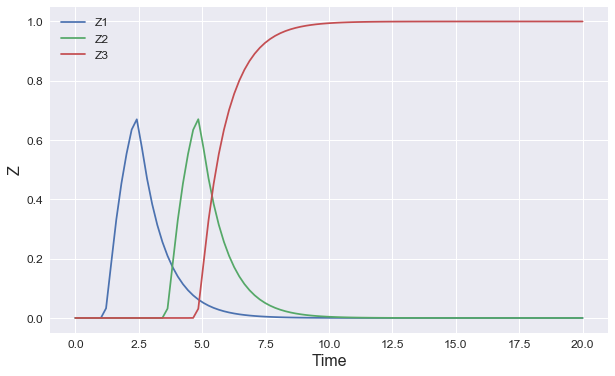

In [7]:
plt.plot(time,U[:,4],label='Z1')
plt.plot(time,U[:,5],label='Z2')
plt.plot(time,U[:,6],label='Z3')

plt.xlabel('Time')
plt.ylabel('Z')
plt.legend()
plt.show()